In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read pickel
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [4]:
ball_positions = [x.get(1, []) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions, columns = ['x1', 'y1', 'x2', 'y2'])

df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [6]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods = 1, center=False).mean()


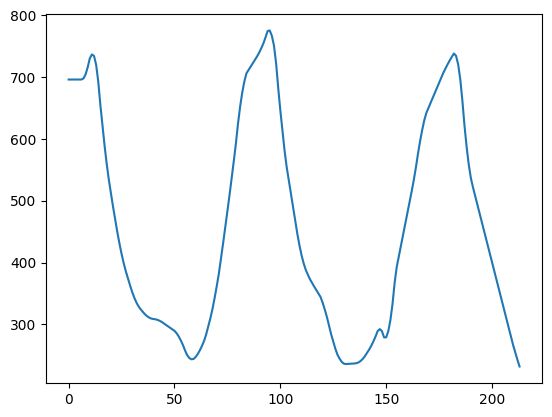

In [8]:
#Plot mid y rolling mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [9]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

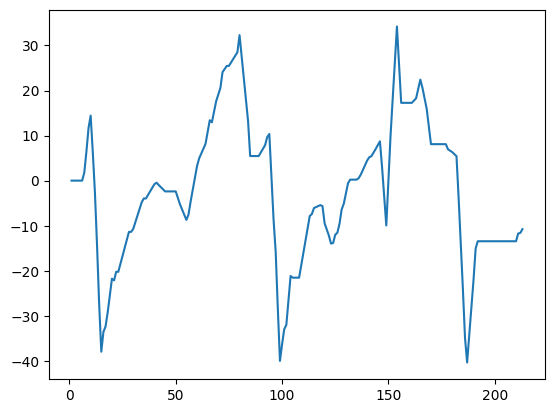

In [10]:
plt.plot(df_ball_positions['delta_y'])

In [11]:
df_ball_positions['ball_hit'] = 0

In [17]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods = 1, center=False).mean()
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
minimum_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit*1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1

        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_num_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

C:\Users\mrice\AppData\Local\Temp\ipykernel_19540\3623284146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\mrice\AppData\Local\Temp\ipykernel_19540\3623284146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\mrice\AppData\Local\Temp\ipykernel_19540\3623284146.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_posit

In [23]:
df_ball_positions.loc[149, 'ball_hit'] = 0
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,778.289673,718.164185,795.942688,737.261902,727.713043,736.658777,6.335455,1
58,926.189893,241.607208,937.181055,252.834247,247.220728,243.442650,-2.032124,1
95,623.247223,748.185730,641.848602,767.610809,757.898270,775.386844,0.830789,1
131,717.244568,230.490440,727.681763,242.018257,236.254349,235.818123,-0.584052,1
182,1296.500732,741.834839,1312.196533,758.730896,750.282867,738.179889,5.427863,1


In [24]:
frame_num_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()